In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

import matplotlib.pyplot as plt

%matplotlib inline

# Import

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
print(type(mnist))
mnist.train.images.shape

<class 'tensorflow.contrib.learn.python.learn.datasets.base.Datasets'>


(55000, 784)

# Part 1

# Model

In [4]:
x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
y = tf.nn.softmax(tf.matmul(x, W) + b)


y_ = tf.placeholder(tf.float32, [None, 10])
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))


correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy_measure = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

# Evaluate

In [5]:
loss_over_time = []
accuracy_over_time = []


init = tf.initialize_all_variables()

sess = tf.Session()
sess.run(init)
    
for i in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    _, loss = sess.run([train_step, cross_entropy], feed_dict={x: batch_xs, y_: batch_ys})
    accuracy = sess.run(accuracy_measure, feed_dict={x:mnist.test.images, y_:mnist.test.labels})
    loss_over_time.append(loss)
    accuracy_over_time.append(accuracy)
    

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [6]:
def plot_training_metrics():
    global loss_over_time, accuracy_over_time
    
    fig, axes = plt.subplots(1,2, figsize=(20,10))

    axes[0].plot(accuracy_over_time)
    axes[0].set_title("Accuracy")
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Classification Accuracy (%)')


    axes[1].plot(loss_over_time)
    axes[1].set_title("Loss")
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('Cost Function (softmax)')

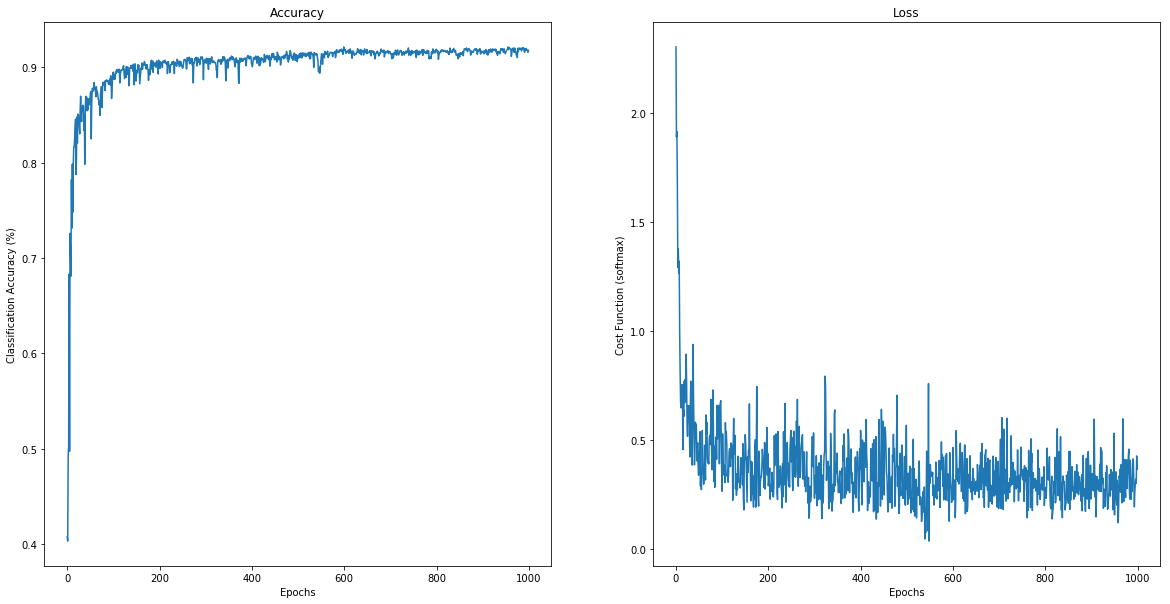

In [7]:
plot_training_metrics()

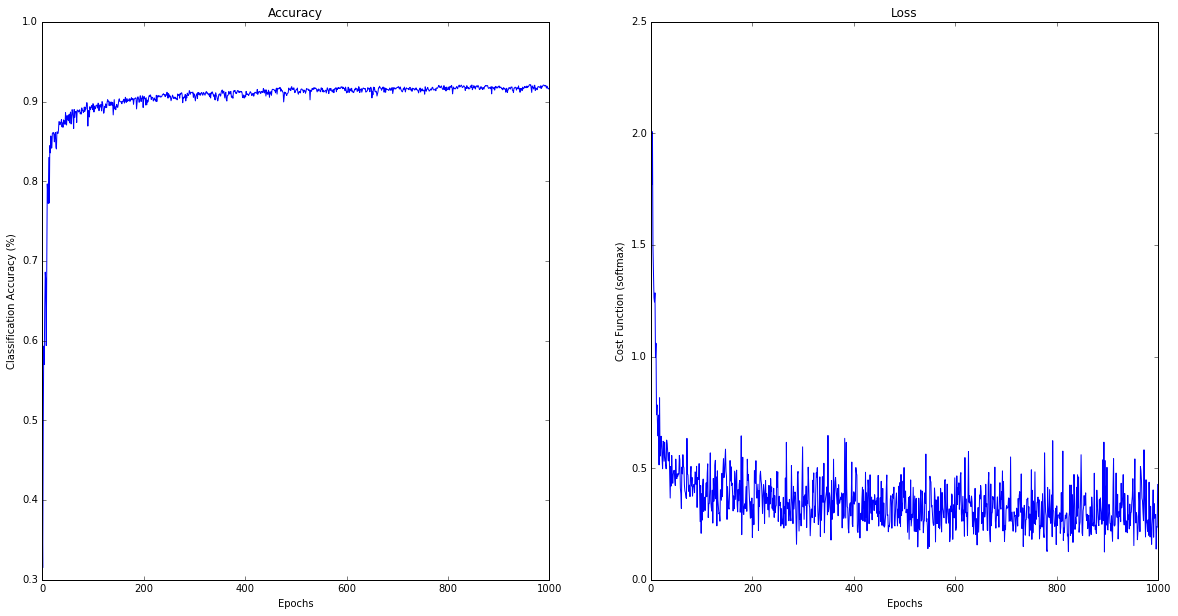

In [14]:
plot_training_metrics()

# Part 2

# Model

In [14]:
x = tf.placeholder(tf.float32, [None, 784])


#  layer 1
W1 = tf.Variable(tf.random_normal([784, 200], stddev=0.001))
b1 = tf.Variable(tf.random_normal([200], stddev=0.001))
y1 = tf.nn.relu(tf.matmul(x, W1) + b1)


# #  layer 2
W2 = tf.Variable(tf.random_normal([200, 10], stddev=0.001))
b2 = tf.Variable(tf.random_normal([10], stddev=0.001))
y = tf.nn.softmax(tf.matmul(y1, W2) + b2)



y_ = tf.placeholder(tf.float32, [None, 10])
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))


correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy_measure = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy)

# Evaluate

In [15]:
loss_over_time = []
accuracy_over_time = []


init = tf.initialize_all_variables()

sess = tf.Session()
sess.run(init)
    
for i in range(2000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    _, loss = sess.run([train_step, cross_entropy], feed_dict={x: batch_xs, y_: batch_ys})
    accuracy = sess.run(accuracy_measure, feed_dict={x:mnist.test.images, y_:mnist.test.labels})
    loss_over_time.append(loss)
    accuracy_over_time.append(accuracy)
    

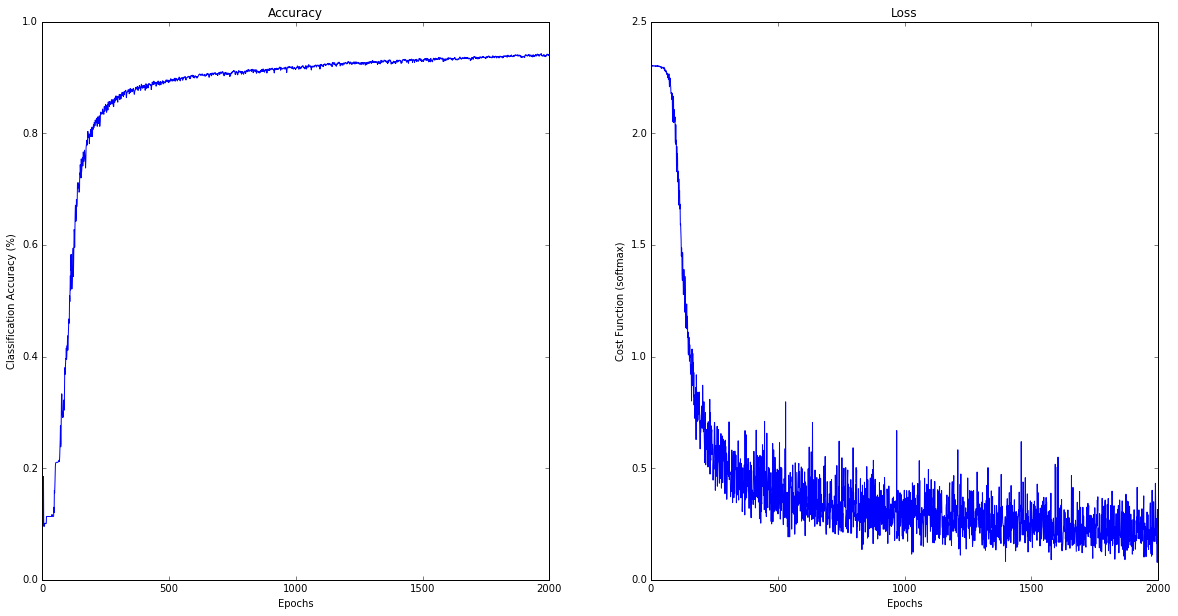

In [16]:
plot_training_metrics()